# import

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from tableone import TableOne, load_dataset

import random
import seaborn as sns
pd.options.display.max_rows=300
pd.set_option('display.max_columns', None)

In [ ]:
df_type = pd.read_csv("../../01.MIMICIV_SAKI_trajCluster/df_mixAK_fea4_C3.csv")
df_type_filt = df_type.loc[:,["stay_id","groupHPD"]]
df_type_filt = df_type_filt.drop_duplicates()
all_lst = df_type_filt.stay_id.unique().tolist()
print("The number of included patients:",len(all_lst))

df_type_filt_count = pd.DataFrame(df_type_filt["groupHPD"].value_counts()).reset_index()
df_type_filt_count.columns = ["groupHPD","count_all"]
df_type_filt_count

In [3]:
df_time = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_mimic/disease_definition/AKI/sk_event_time.csv")
df_time = df_time[["stay_id","sepsis_onset", "saki_onset"]]
df_time = pd.merge(df_type_filt, df_time, how="inner", on="stay_id")
df_time["sepsis_onset"] = pd.to_datetime(df_time["sepsis_onset"])
df_time["saki_onset"] = pd.to_datetime(df_time["saki_onset"])
df_time.head(2)

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,stay_id,groupHPD,sepsis_onset,saki_onset
0,30003598,1,2189-04-14 21:00:00,2189-04-15 03:04:00
1,30004144,2,2126-04-05 00:00:00,2126-04-05 06:00:00


# Compare uo，fb

In [4]:
df_bt_at = pd.read_csv("df_diuretic_responsitive_match.csv")
# df_bt_at = pd.read_csv("df_diuretic_responsitive.csv")
df_bt_at.head(1)

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,stay_id,label_diu_res,groupHPD,mortality_28d,survival_28day,creatinine,urineoutput,baseline_Scr,colloid_bolus,sofa_norenal,Congestive_heart_failure,weight,age,gender,height,respiration_sofa,cardiovascular_sofa,aniongap,pt,sbp,coagulation_sofa,cum_fluidbance,is_diu,baseexcess,hemoglobin,liver_sofa,furosemide_amount,fluidbance,gcs_verbal,gcs,mbp,potassium,spo2,platelet,renal_sofa,gcs_eyes,bicarbonate,sodium,temperature,gcs_motor,po2,ptt,glucose,pco2,chloride,rbc,wbc,ph,sofa,mchc,mcv,hematocrit,first_use_amount,cns_sofa,time,heart_rate,fio2,resp_rate,furosemide_amount_kg,dbp,mch,is_diu_byid,lactate,rdw,calcium,first_use_time,group_creteria,df_.tpsa$id
0,30008792,Non-responsive,1,1,3.0,1.075,1820.0,1.2,71.972473,1.458333,1,78.0,87,0,168.0,0.0,1.0,15.75,26.55,110.797619,0.0,-1748.03,1,3.833333,11.575,0.0,166.567373,-1748.03,4.875,14.375,67.577381,3.85,96.5625,289.25,0.458333,3.5,33.75,137.5,36.79125,6.0,90.75,35.125,118.0,43.375,92.0,4.2625,9.725,7.41875,1.916667,31.45,87.0,36.85,165.126665,0.458333,1,101.9375,44.166667,23.447917,2.14,53.738095,27.175,1,1.6,15.675,8.8,-2.0,Non-responsive,2


/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  C1


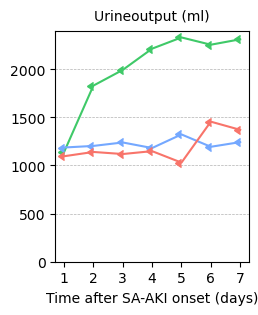

  C1


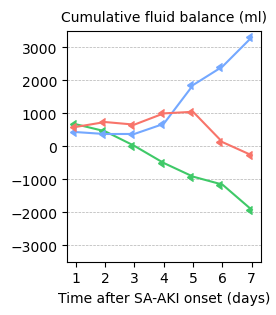

  C2


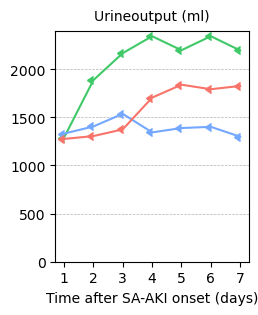

  C2


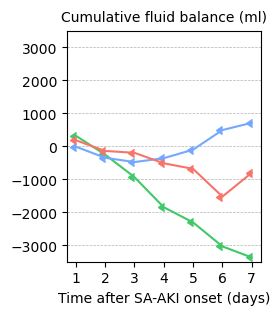

  C3


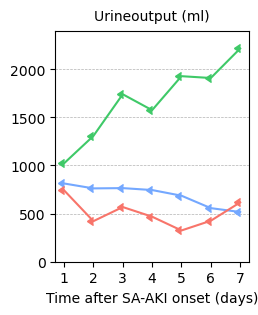

  C3


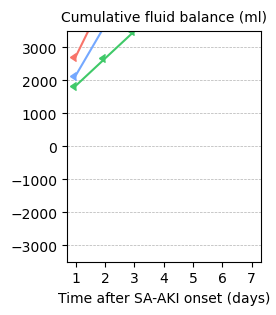

In [10]:
import matplotlib.pyplot as plt
lab_dict = {"furosemide_amount": "Furosemide(mg)",'free_calcium':'free_calcium',  "cum_fluidbance":"Cumulative fluid balance (ml)","urineoutput":"Urineoutput (ml)","colloid_bolus":"Infusion (ml)",'calcium':'calcium','sodium':'sodium', 'potassium':'potassium', 'chloride': 'chloride'}
fea_lst = ["urineoutput","cum_fluidbance"]#,"furosemide_amount","colloid_bolus"] #,", "furosemide_amount",
# fea_lst = [ 'calcium', 'chloride', 'free_calcium']# , 'sodium','potassium'
# fea_lst = ['furosemide_amount']
min_dict = {"urineoutput":0,"cum_fluidbance":-3500,'free_calcium':1.12,'calcium':8.5,'sodium':135, 'potassium':3.5, 'chloride':95}
max_dict = {"urineoutput":2400,"cum_fluidbance":3500,'free_calcium':1.32,'calcium':10.5,'sodium':145, 'potassium':5, 'chloride':105}

for class_ in [1,2,3]:
    df_fea = pd.read_csv("./mimic_diuretic_survival_all.csv")
    df_fea = pd.merge(df_fea,df_bt_at[["stay_id","label_diu_res"]],how="inner",on="stay_id")
    df_fea = df_fea[df_fea["groupHPD"]==class_]
    for fea in fea_lst:
        choose_time_lst = [1,2,3,4,5,6,7] # -1,
        df =  df_fea[df_fea["time"].isin(choose_time_lst)] 
        df1 = df[df["label_diu_res"]=="responsive"].groupby('time').agg({fea:"mean"}).reset_index() #[[fea,"time"]]
        df2 = df[df["label_diu_res"]=="Non-responsive"].groupby('time').agg({fea:"mean"}).reset_index() #[[fea,"time"]]
        df3 = df[df["label_diu_res"]=="No diuretic"].groupby('time').agg({fea:"mean"}).reset_index()#[[fea,"time"]]
        fig = plt.figure(figsize=(2.5,3))
        size = 10
        ax=plt.gca()
        ax.tick_params(axis='both', which='both', labelsize=size,
               bottom=True, top=False, labelbottom=True,
               left=True, right=False, labelright=False, labelleft=True)
        ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
        plt.plot(df1.time.tolist(),df1[fea].tolist(),marker=8,label="Diuertic-responsive",c="#3fc968")
        plt.plot(df2.time.tolist(),df2[fea].tolist(),marker=8,label="Diuertic-nonresponsive",c="#74a8ff")
        plt.plot(df3.time.tolist(),df3[fea].tolist(),marker=8,label="No diuretic",c="#f8746a")
#        plt.legend(ncol=3,frameon=False)
        plt.xticks([1,2,3,4,5,6,7],[1,2,3,4,5,6,7])
        print("  C" + str(class_))
        tit =lab_dict[fea]
        plt.title(tit,x=0.5,y=1.01,fontsize=size)
        plt.xlabel('Time after SA-AKI onset (days)',fontsize=size)
#         plt.axhline(y=min_dict[fea], color='black', linestyle='--', linewidth=1)
#         plt.axhline(y=max_dict[fea], color='black', linestyle='--', linewidth=1)
        plt.ylim([min_dict[fea],max_dict[fea]])
        tit = "mimic_timeseries_C" + str(class_) + "_" +fea + ".pdf"
        plt.savefig(tit, bbox_inches = 'tight')
        plt.show()

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  C1


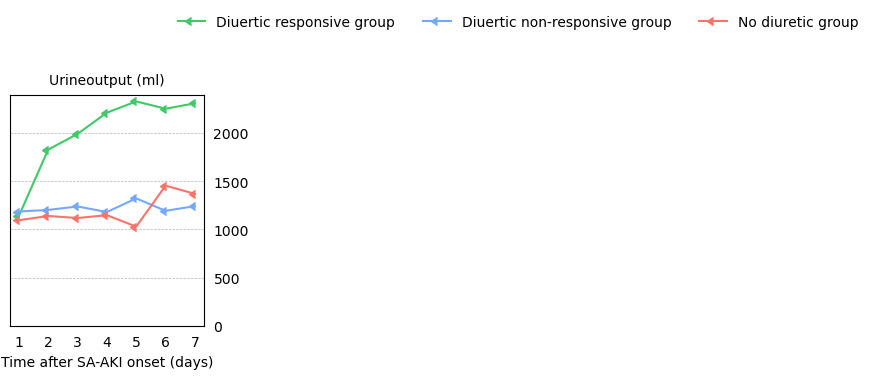

In [ ]:
# legend
import matplotlib.pyplot as plt
lab_dict = {"furosemide_amount": "Furosemide(mg)",  "cum_fluidbance":"Cumulative fluid balance (ml)","urineoutput":"Urineoutput (ml)","colloid_bolus":"Infusion (ml)",'calcium':'calcium','sodium':'sodium', 'potassium':'potassium', 'chloride': 'chloride'}
fea_lst = ["urineoutput"] #,"colloid_bolus", "furosemide_amount",

for class_ in [1]:
    df_fea = pd.read_csv("./mimic_diuretic_survival.csv")
    df_fea = pd.merge(df_fea,df_bt_at[["stay_id","label_diu_res"]],how="inner",on="stay_id")
    df_fea = df_fea[df_fea["groupHPD"]==class_]
    for fea in fea_lst:
        choose_time_lst = [1,2,3,4,5,6,7] 
        df =  df_fea[df_fea["time"].isin(choose_time_lst)] 
        df1 = df[df["label_diu_res"]=="responsive"].groupby('time').agg({fea:"mean"}).reset_index() #[[fea,"time"]]
        df2 = df[df["label_diu_res"]=="Non-responsive"].groupby('time').agg({fea:"mean"}).reset_index() #[[fea,"time"]]
        df3 = df[df["label_diu_res"]=="No diuretic"].groupby('time').agg({fea:"mean"}).reset_index()#[[fea,"time"]]

        fig = plt.figure(figsize=(2.5,3))
        size = 10
        ax=plt.gca()
        ax.tick_params(axis='both', which='both', labelsize=size,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelright=True, labelleft=False)

        ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
        plt.plot(df1.time.tolist(),df1[fea].tolist(),marker=8,label="Diuertic responsive group",c="#3fc968")
        plt.plot(df2.time.tolist(),df2[fea].tolist(),marker=8,label="Diuertic non-responsive group",c="#74a8ff")
        plt.plot(df3.time.tolist(),df3[fea].tolist(),marker=8,label="No diuretic group",c="#f8746a")
        plt.legend(ncol=3,loc=2,frameon=False,bbox_to_anchor=(0.8,1.4))
        plt.xticks([1,2,3,4,5,6,7],[1,2,3,4,5,6,7])
        print("  C" + str(class_))
        tit =lab_dict[fea]
        plt.title(tit,x=0.5,y=1.01,fontsize=size)
        plt.xlabel('Time after SA-AKI onset (days)',fontsize=size)
        plt.ylim([min_dict[fea],max_dict[fea]])

        plt.savefig("mimic_timeseries_legend.pdf", bbox_inches = 'tight')
        plt.show()

In [7]:
sss

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'sss' is not defined

# stat-matched three groups

In [ ]:
# Draw a table
df_supp = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_mimic/treatment/mimic_lifesupport.csv")
df =  pd.merge(df_supp,df_bt_at,how="right",on="stay_id")
df[['is_vaso', 'is_mv', 'is_rrt', 'is_crrt']] = df[['is_vaso', 'is_mv', 'is_rrt', 'is_crrt']].fillna(0)

def get_tableone(df):
    columns = ['mortality_28d','is_vaso', 'is_mv', 'is_rrt', 'is_crrt',
       'survival_28day',  'creatinine',  
       'urineoutput', 'colloid_bolus', 'sofa_norenal',
       'Congestive_heart_failure' 
          ]
    categorical = [ 'mortality_28d', 'Congestive_heart_failure','is_vaso', 'is_mv', 'is_rrt', 'is_crrt'
    ]
    nonnormal = ['survival_28day', 'bun', 'creatinine',  'urineoutput', 'colloid_bolus', 'sofa_norenal' ] 
    df = TableOne(df, columns=columns, nonnormal=nonnormal, categorical=categorical, groupby = ["label_diu_res"], pval=True)
    df = pd.DataFrame(df.tableone).reset_index()
    df = df.droplevel(level=0, axis=1)
    return df

In [ ]:
tmp_df = df[df.groupHPD==1]
get_tableone(tmp_df)

In [ ]:
tmp_df = df[df.groupHPD==2]
get_tableone(tmp_df)

In [ ]:
tmp_df = df[df.groupHPD==3]
get_tableone(tmp_df)

In [ ]:
s

# other

In [ ]:
df_fea = pd.read_csv("./mimic_diuretic_survival.csv")
df_fea = pd.merge(df_fea,df_bt_at[["stay_id","label_diu_res"]],how="inner",on="stay_id")
df_fea = df_fea[(df_fea["groupHPD"]==3)& (df_fea["time"]==7)]
tmp_df = df_fea.groupby(["label_diu_res"]).agg({"cum_fluidbance":"mean"}) 
tmp_df

In [ ]:
fea = "cum_fluidbance"
data_groups = [df_fea[fea],
               df_fea[df_fea["label_diu_res"]=="responsive"][fea],
               df_fea[df_fea["label_diu_res"]=="Non-responsive"][fea],
               df_fea[df_fea["label_diu_res"]=="No diuretic"][fea]]
from scipy.stats import ranksums
for v in [[1,2],[1,3],[2,3]]:
    i = v[0]
    j = v[1]
    print(i,j)
    data1 = data_groups[i]
    data2 = data_groups[j]
    differences = [x - y for x, y in zip(data1, data2)]
    statistic, p_value = ranksums(data1, data2)
    print("Rank sum test statistic:", statistic)
    print("p value:", p_value)